<a href="https://colab.research.google.com/github/AnuragGorkar/Credit_Card_Fraud-Detection/blob/master/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import sklearn

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#LOADING AND VISUALISING DATA

In [0]:
data = pd.read_csv("/content/drive/My Drive/MACHINE LEARNING DATASETS/creditcard.csv")

In [0]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [0]:
print(data.shape)

(284807, 31)


In [0]:
print(data.head())

   Time        V1        V2        V3  ...       V27       V28  Amount  Class
0   0.0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62      0
1   0.0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69      0
2   1.0 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66      0
3   1.0 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50      0
4   2.0 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99      0

[5 rows x 31 columns]


In [0]:
print(data.describe())

                Time            V1  ...         Amount          Class
count  284807.000000  2.848070e+05  ...  284807.000000  284807.000000
mean    94813.859575  3.919560e-15  ...      88.349619       0.001727
std     47488.145955  1.958696e+00  ...     250.120109       0.041527
min         0.000000 -5.640751e+01  ...       0.000000       0.000000
25%     54201.500000 -9.203734e-01  ...       5.600000       0.000000
50%     84692.000000  1.810880e-02  ...      22.000000       0.000000
75%    139320.500000  1.315642e+00  ...      77.165000       0.000000
max    172792.000000  2.454930e+00  ...   25691.160000       1.000000

[8 rows x 31 columns]


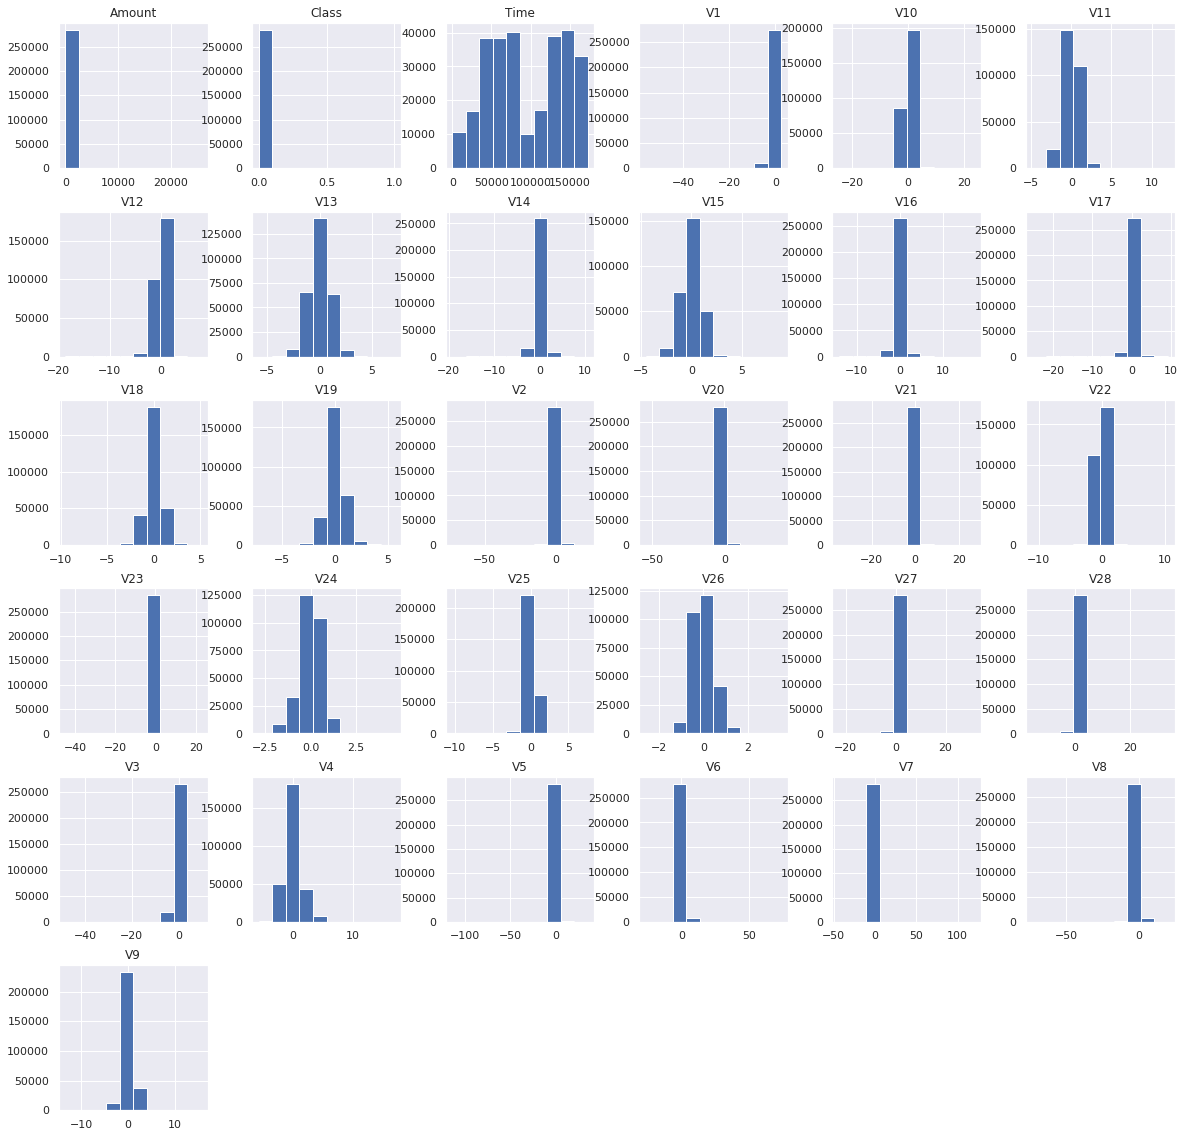

In [0]:
data.hist(figsize = (20,20))
plt.show()

In [0]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]

print(len(fraud))
print(len(valid))
print(len(data))

fraud_percent = len(fraud) / float(len(data)) * 100
outlier_fraction = len(fraud) / float(len(valid))
print(outlier_fraction)
print(fraud_percent)

492
284315
284807
0.0017304750013189597
0.1727485630620034


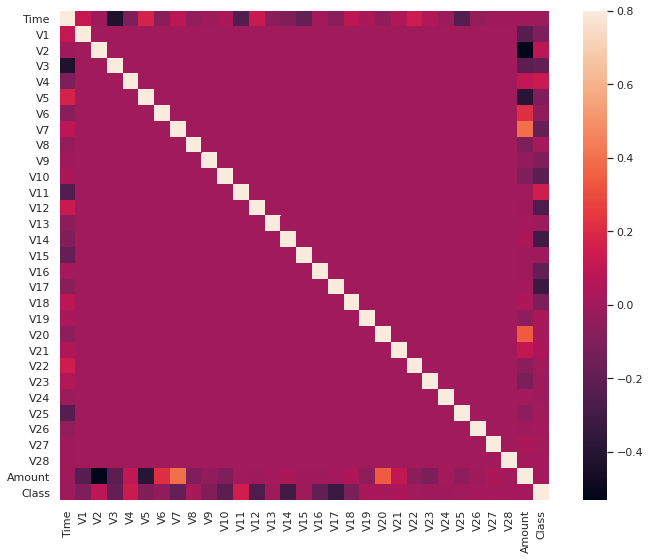

In [0]:
co_relation_matrix = data.corr()
fig = plt.figure(figsize = (12,9))
sns.heatmap(co_relation_matrix, vmax = .8, square = True)

In [0]:
columns = data.columns.tolist()

columns = [c for c in columns if c not in ["Class"]]

target = "Class"

X = data[columns]
Y = data[target]

print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


#ISOLATION FOREST AND LOCAL OUTLIER FACTOR 

In [0]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [0]:
state = 1
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X), 
                                        contamination = outlier_fraction,
                                        random_state = state),
    "Local Outlier Factor": LocalOutlierFactor(
                                        n_neighbors = 20,
                                        contamination = outlier_fraction)
}

In [0]:
n_outliers = len(fraud)

for i , (clf_name, clf) in enumerate(classifiers.items()):
  if clf_name == "Local Outlier Factor":
    y_pred = clf.fit_predict(X)
    scores_pred = clf.negative_outlier_factor_
  else:
    clf.fit(X)
    scores_pred = clf.decision_function(X)
    y_pred = clf.predict(X)

  y_pred[y_pred == 1] = 0
  y_pred[y_pred == -1] = 1

  n_errors = (y_pred != Y).sum()

  print(f"{clf_name}  , {n_errors}")
  print(accuracy_score(Y,y_pred))
  print(classification_report(Y, y_pred))

Isolation Forest  , 645
0.997735308472053
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.34      0.35      0.35       492

    accuracy                           1.00    284807
   macro avg       0.67      0.67      0.67    284807
weighted avg       1.00      1.00      1.00    284807

Local Outlier Factor  , 935
0.9967170750718908
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.05      0.05      0.05       492

    accuracy                           1.00    284807
   macro avg       0.52      0.52      0.52    284807
weighted avg       1.00      1.00      1.00    284807

